# Quantum Computer simulator (has some mistake...)

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy import sin, cos, sqrt, pi

## Functions

In [2]:
def all_states(n):
    """
    Generate all possible binary representations of states for a given number of bits.
    For a given quantum system this represents a linear combination of all possible 
    states in superposition.
    
    Parameters:
        n (int): Number of bits for binary representation.
    Returns:
        numpy.ndarray: An array containing all possible binary states.
    """
    # Create a range from 0 to 2^n and convert to binary using bitwise operations
    num_states = 2 ** n
    possible_binary_states = [
        [(i >> j) & 1 for j in range(n-1, -1, -1)] for i in range(2 ** n)
    ]
    possible_binary_states = np.array(possible_binary_states)
    return possible_binary_states


def selection_rules(n):
    """
    Generate selection rules for N bits based on transitions.

    Parameters:
        n (int): Number of bits.

    Returns:
        numpy.ndarray: A 2D array representing the selection rules.
    """
    num_states = 2**n
    states = np.arange(1, num_states + 1)  # State indices (1-based indexing)
    binary_states = all_states(n)

    # Precompute Hamming distances
    hamming_distances = np.sum(np.abs(binary_states[:, None] - binary_states), axis=2)

    # Identify transitions with Hamming distance of 1
    rules = [states[np.where(hamming_distances[i] == 1)[0]].tolist() for i in range(num_states)]
    return np.array(rules)

In [3]:
#ENERGIAS DEL SISTEMA POR UNIDAD DE h-barra
def Energy(estado, larmor, ising, n):
    """
    Compute the energy of a system governed by Larmor and Ising interactions.

    Parameters:
        estado (list or array): State of the system (e.g., [0, 1, 1]).
        larmor (list or array): Larmor frequencies for each spin.
        ising (list): Ising interaction coefficients.
        n (int): Number of bits.

    Returns:
        float: Energy of the system.
    """
    # Ensure inputs are NumPy arrays
    estado = np.array(estado, dtype=int)
    larmor = np.array(larmor, dtype=float)

    # Calculate the non-interaction energy term
    energy_NI = np.dot((-1) ** estado, larmor)

    # Calculate the interaction energy term
    energy_I = 0
    for j in range(1, n):  # j represents the interaction distance
        energy_I += np.sum(ising[j - 1] * (-1) ** (estado[:-j] + estado[j:]))

    # Calculate total energy
    energy_states = -0.5 * (energy_NI + 0.5 * energy_I)
    return energy_states


In [4]:
def diferential_equation_x_y(t, x, y, r, pos, contador, contKL, w_mag):
    global U, K, L, h, cuenta
    
    theta = lambda t: w_mag*t + phi
    B = lambda t, k, j: W_kj(k,j)*t + theta(t)
    
    if contKL == 1:
        ALPHA = 0
    elif (contKL == 2) or (contKL == 3):
        ALPHA = .5
    elif contKL == 4:
        ALPHA = 1
    else:
         ALPHA = 0

    t = t + h * ALPHA

    sumax = []
    sumay = []
    for i in range(len(r)):
        if pos < r[i]:
            A1 = 1
            B1 = B(t, pos ,r[i])
        elif pos > r[i]:
            A1 = 0
            B1 = B(t, r[i] ,pos)

        ALPHA_K = ALPHA * K[contKL-1][r[i]-1]
        ALPHA_L = ALPHA * L[contKL-1][r[i]-1]
        X_rk_j = x[r[i]-1][contador]
        Y_rk_j = y[r[i]-1][contador]
                   
        x_value = U/2 * ((-1)**(A1) * sin(B1) * (X_rk_j + ALPHA_K) - cos(B1) * (Y_rk_j + ALPHA_L))
        y_value = U/2 * (cos(B1) * (X_rk_j + ALPHA_K) + (-1)**(A1) * sin(B1) * (Y_rk_j + ALPHA_L))
        sumax.append(x_value)
        sumay.append(y_value)
        cuenta = cuenta + 1

    return sum(sumax), sum(sumay)


In [5]:
w0 = 1/pi # FRECUENCIA DEL TIEMPO TAO
U = 0.1/w0 #/np.sqrt(4*4**2-1)#.1/w0 # FRECUENCIA DE RABI'
phi = 0.000
#Num = int(input("Number of Qubits: "))
Num = 3
#zeta = int(input("Value of ZETA: "))
zeta = 100

wz = np.array([100 + i*zeta for i in range(Num)])
w = list(wz/w0)
#INTERACCIÓN QUBIT-QUBIT (ISING)
if Num>1:
    #interaction=float((input('Interacción qubit-qubit: '))) / w0
    interaction = 0.001
    J = []
    for i in range(Num-1):
        J.append(interaction/((10**i)**i))

#ESTADOS POSIBLES DEL SISTEMA
estados=all_states(Num)
#ENERGIAS DEL SISTEMA
E = [Energy(estados[i],w,J, Num) for i in range(len(estados))]
#DETERMINAR LAS REGLAS DE SELECCION
r = selection_rules(Num)

In [6]:
# Functions to compute additional elements
W_kj = lambda k, j: (E[k-1] - E[j-1])/w0

In [7]:
# Given the states, the selection rules and the associated energy one can 
# pre-compute all the possible problems this quantum  machine may have

In [8]:
possible_values_for_gates = []
for state in (np.array(range(Num**2-1))+1):
    for rule in r[state-1]:
        transition = f'{estados[state-1]} --> {estados[rule-1]}'
        associated_energy = W_kj(state, rule)
        values = [state, rule, transition, associated_energy]
        possible_values_for_gates.append(values)
possible_values_for_gates = pd.DataFrame(possible_values_for_gates, columns=['state', 'rule', 'transition', 'associated_energy'])

In [15]:
possible_values_for_gates[possible_values_for_gates.associated_energy == possible_values_for_gates[(
    (possible_values_for_gates.state==7) & (possible_values_for_gates.rule==8))
].associated_energy.iloc[0]]

,state,rule,transition,associated_energy
20,7,8,[1 1 0] --> [1 1 1],-2960.879592


In [118]:
#DELIMITACIONES DEL TIEMPO
pp = pi/U #PI PULSO
hpp = pi/(2*U)# PI MEDIO PULSO
h = 0.001 # TAMANHO DE PASO

In [128]:
# Algoritmo de teleportación cuántica 3qbits

# DELIMITACIONES DEL METODO NUMERICO.
tf0 = 0 # TIEMPO INICIAL: siempre cero
tf1 = tf0 + hpp # TIEMPOS FINALES DEFINIDOS POR PI-PULSOS
tf2 = tf1 + hpp
tf3 = tf2 + pp
tf4 = tf3 + pp
tf5 = tf4 + hpp
tf6 = tf5 + hpp
tf7 = tf6 + hpp
tf8 = tf7 + hpp
tf = tf8 + hpp # TIEMPO FINAL
n = int((tf - tf0)/h) # NUMERO DE ITERACIONES

In [129]:
#ARREGLOS PARA SOLUCIÓN NUMÉRICA
vx,vy,cx,cy,D = [],[],[],[],[]

for i in range (2**Num):
    vx.append(np.zeros(n))
    vy.append(np.zeros(n))
    cx.append(np.zeros(n))
    cy.append(np.zeros(n))
    D.append(np.zeros(n))

N = np.zeros(n)
T = np.zeros(n)
K = np.zeros((4+1,(2**Num)))
L = np.zeros((4+1,(2**Num)))
cuenta=0
w_mag = 0

In [130]:
    # T[i+1]= T[i]+h
    # if ( T[i+1] <= tf1 ):
    #     w_mag = W_kj(17,1)
    # elif ( T[i+1] > tf1 and T[i+1] <= tf2 ):
    #     w_mag = W_kj(25,17)
    # elif ( T[i+1] > tf2 and T[i+1] <= tf3 ):
    #     w_mag = W_kj(29,25)
    # elif ( T[i+1] > tf3 and T[i+1] <= tf4 ):
    #     w_mag = W_kj(31,29)
    # elif ( T[i+1] > tf4 and T[i+1] <= tf5 ):
    #     w_mag = W_kj(32,31)
    # elif ( T[i+1] > tf5 and T[i+1] <= tf ):
    #     w_mag = 0



# # TELEPORTACIÓN CUÁNTICA 3QBits:
#     T[i+1] = T[i] + h
#     if ( T[i+1] <= tf1 ):
#         w = Wij(3,1)
#     elif ( T[i+1] > tf1 and T[i+1] <= tf2 ):
#         w = Wij(7,5)
#     elif ( T[i+1] > tf2 and T[i+1] <= tf3 ):
#         w = Wij(4,3)
#     elif ( T[i+1] > tf3 and T[i+1] <= tf4 ):
#         w = Wij(6,5)
#     elif ( T[i+1] > tf4 and T[i+1] <= tf5 ):
#         w = Wij(5,1)
#     elif ( T[i+1] > tf5 and T[i+1] <= tf6 ):
#         w = Wij(6,2)
#     elif ( T[i+1] > tf6 and T[i+1] <= tf7 ):
#         w = Wij(8,4)
#     elif ( T[i+1] > tf7 and T[i+1] <= tf8 ):
#         w = Wij(7,3)
#     elif ( T[i+1] > tf8 and T[i+1] <= tf ):
#         w = 0
#     elif ( T[i+1] > tf ):
#         break 

In [131]:
# TELEPORTACIÓN CUÁNTICA
#CONDICIONES INICIALES DEL SISTEMA
vx[0][0] = 1/sqrt(2)
vx[4][0] = 1/sqrt(2)


In [132]:
for i in range (0,n-1):
    T[i+1] = T[i] + h
    if ( T[i+1] <= tf1 ):
        w_mag = W_kj(3,1)
    elif ( T[i+1] > tf1 and T[i+1] <= tf2 ):
        w_mag = W_kj(7,5)
    elif ( T[i+1] > tf2 and T[i+1] <= tf3 ):
        w_mag = W_kj(4,3)
    elif ( T[i+1] > tf3 and T[i+1] <= tf4 ):
        w_mag = W_kj(6,5)
    #elif ( T[i+1] > tf4 and T[i+1] <= tf5 ):
        w_mag = W_kj(5,1)
    #elif ( T[i+1] > tf5 and T[i+1] <= tf6 ):
    #    w_mag = W_kj(6,2)
    #elif ( T[i+1] > tf6 and T[i+1] <= tf7 ):
    #    w_mag = W_kj(8,4)
    #elif ( T[i+1] > tf7 and T[i+1] <= tf8 ):
    #    w_mag = W_kj(7,3)
    #elif ( T[i+1] > tf8 and T[i+1] <= tf ):
    #    w_mag = 0
    elif ( T[i+1] > tf ):
        break 
    #RUNGE KUTTA:
    for m in range(1,5):
        for j in range(2**Num):
            diff_eq_res = diferential_equation_x_y(T[i], vx, vy, r[j], j+1, i, m, w_mag)
            K[m,j] = h * diff_eq_res[0]
            L[m,j] = h * diff_eq_res[1]
        cont=0
        for x, y in zip(vx, vy):
            x[i+1]=x[i]+(1/6)*( K[1,cont] + 2*K[2,cont] + 2*K[3,cont] + K[4,cont])
            y[i+1]=y[i]+(1/6)*( L[1,cont] + 2*L[2,cont] + 2*L[3,cont] + L[4,cont] )
            cont=cont+1
            
        for position in range(2**Num):
            cx[position][i] = vx[position][i]*cos(E[position]*T[i]) - vy[position][i]*sin(E[position]*T[i])
            cy[position][i] = vx[position][i]*sin(E[position]*T[i]) + vy[position][i]*cos(E[position]*T[i])
            D[position][i] = (cx[position][i])**2 + (cy[position][i])**2
    for position in range(2**Num):
        cx[position][-1] = vx[position][-1]*cos(E[position]*T[-1]) - vy[position][-1]*sin(E[position]*T[-1])
        cy[position][-1] = vx[position][-1]*sin(E[position]*T[-1]) + vy[position][-1]*cos(E[position]*T[-1])
        D[position][-1] = (cx[position][-1])**2+(cy[position][-1])**2

In [133]:
N=sum(D)

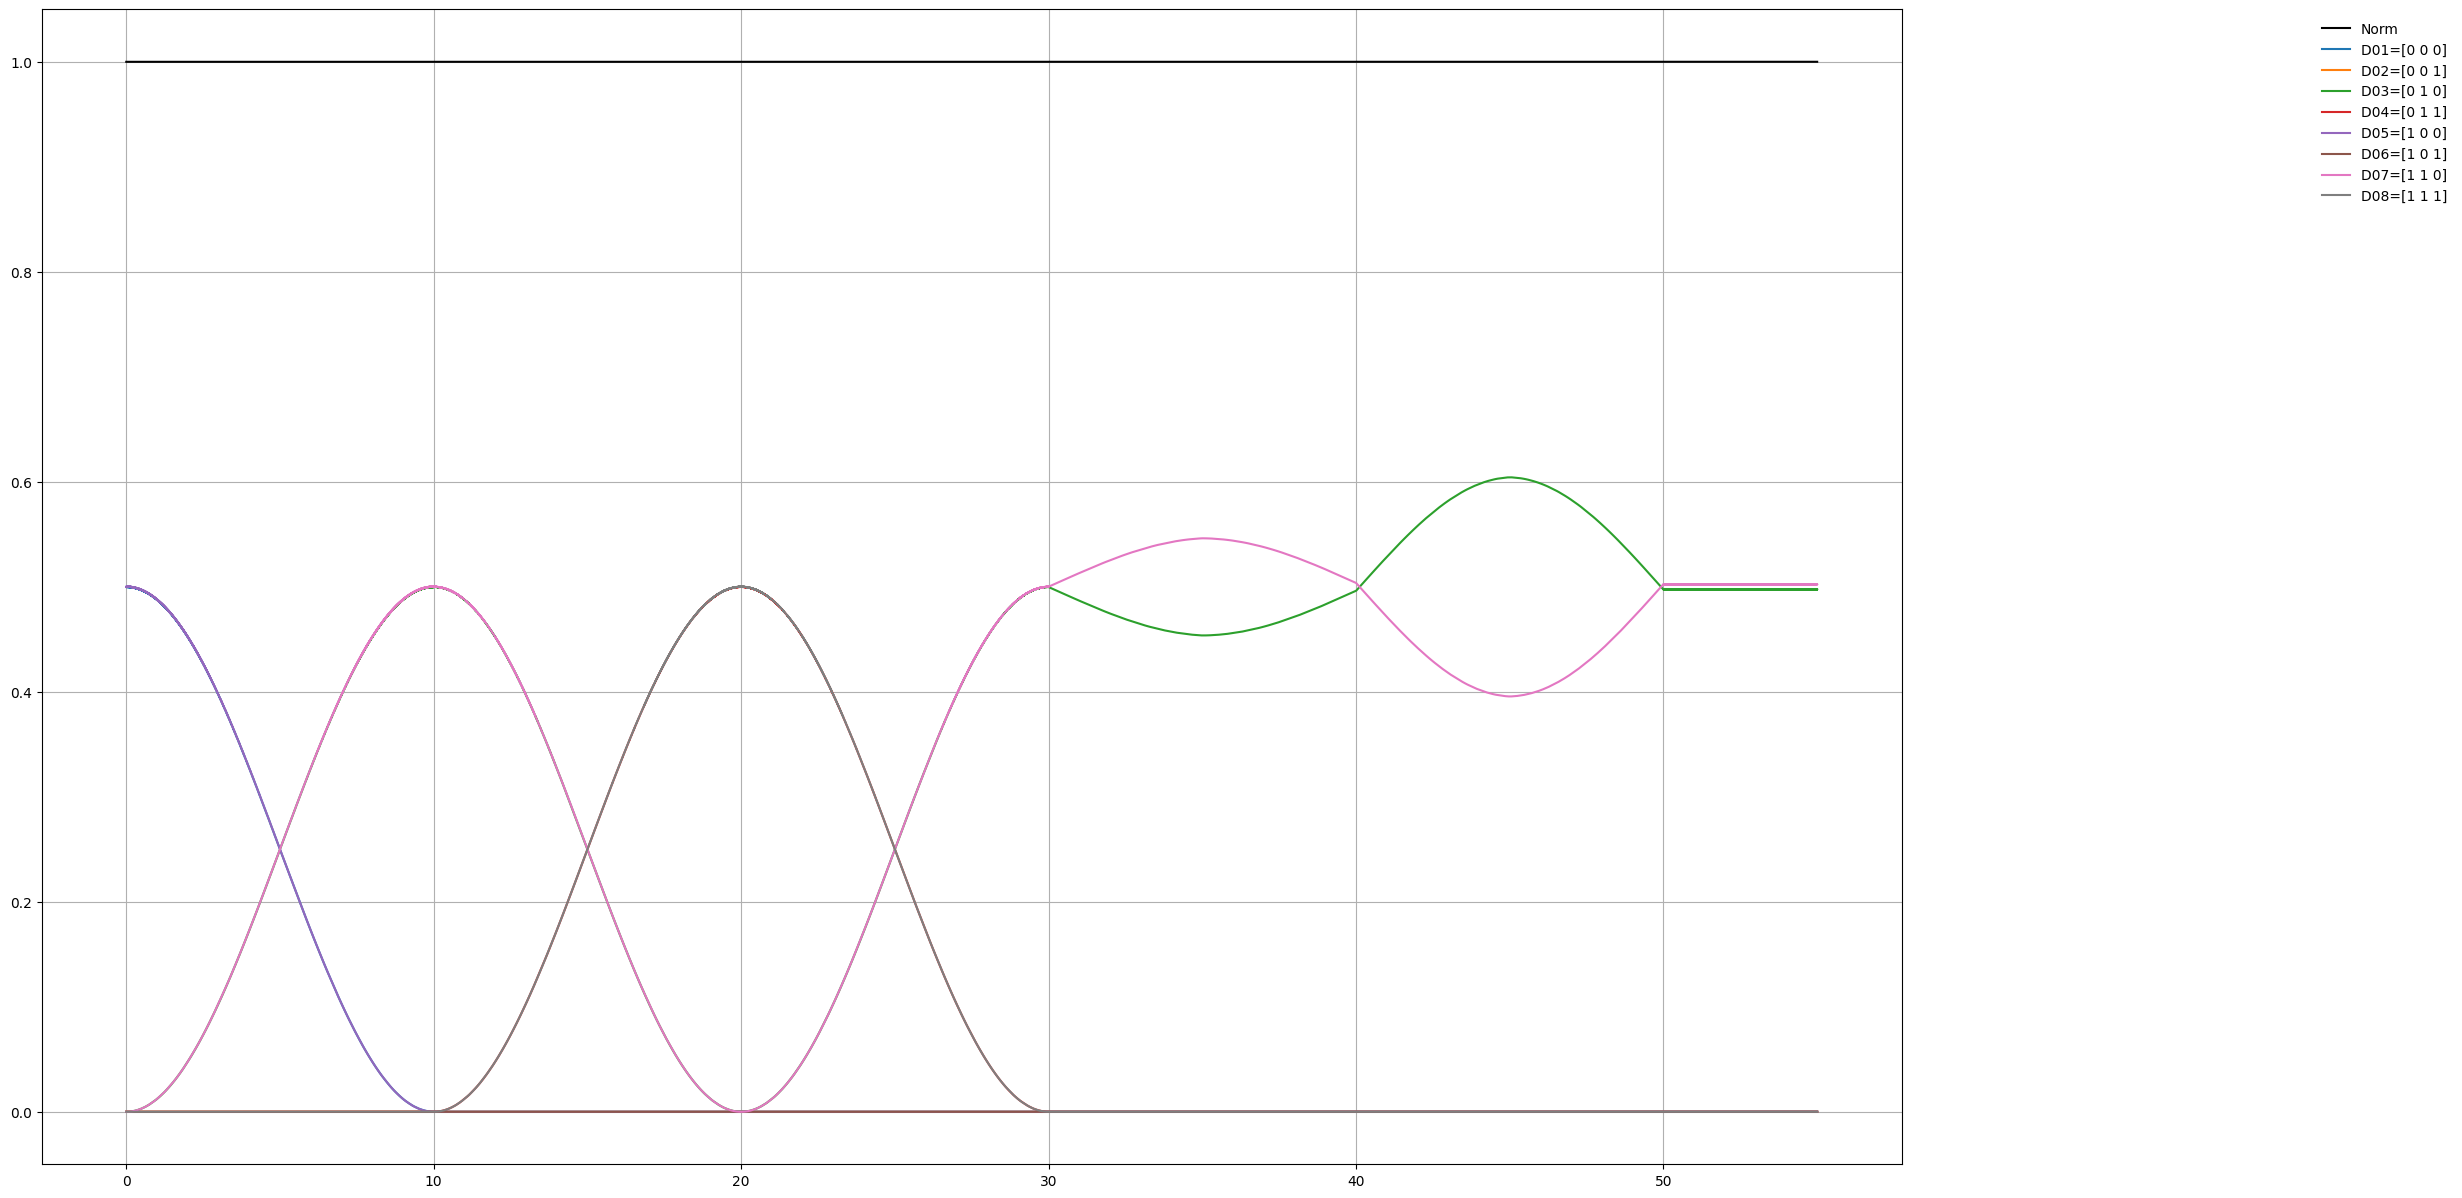

In [134]:
plt.figure(figsize = (30,15))

plt.plot(T,N,label="Norm",color='k')
if Num <= 4:
    for l in range(2**Num):
        if l+1<10:
            plt.plot(T,D[l],label=f'D0{l+1}={estados[l]}')
        else:
            plt.plot(T,D[l],label=f'D{l+1}={estados[l]}')
if Num > 4:
    for l in range(2**Num):
        if l+1<10:
            plt.plot(T,D[l],label=str(l+1))
        else:
            plt.plot(T,D[l],label=str(l+1))

fig = plt.gcf()
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
plt.legend(loc=1, bbox_to_anchor=(1.3, 1.0), frameon=False)
plt.grid()
plt.show()